# Tree,Tree Ensemble, and Grid Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.RandomState(0)
N = 100
X = np.linspace(0, 6, N)[:, np.newaxis]
error = 0.4
y_true = np.sin(X).ravel() + np.sin(6 * X).ravel()
y_noisy = y_true + rng.normal(0, error, X.shape[0])

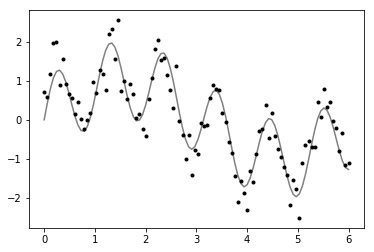

In [3]:
plt.plot(X.ravel(), y_true, color='gray')
plt.plot(X.ravel(), y_noisy, '.k')

This data looks relatively complicated, but if we had the intuition to know that it is
simply the combination of a small number of sine waves, we could use this sparse
representation in Fourier space and use a fast linear estimator.

Taking the FFT of the data gives us two peaks in frequency, indicating that the representation
is sparse in this basis:

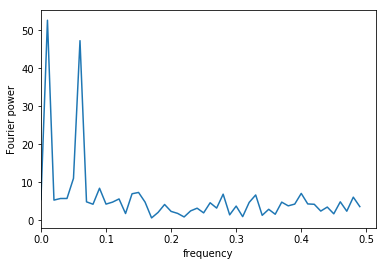

In [4]:
from scipy import fftpack
plt.plot(fftpack.fftfreq(len(y_noisy))[:int(N/2)], abs(fftpack.fft(y_noisy))[:int(N/2)])
plt.xlim(0, None)
plt.xlabel('frequency')
plt.ylabel('Fourier power')

This shows how important **intuition**, especially physical intuition, can be when
performing a learning problem on real-world data.
If you blindly throw algorithms at a data set, you
might be missing a simple intuition which might lead to a sparse representation that
is much more meaningful.

But suppose we don't have any intuition that would lead to representing the data
in a sparse basis.  In this case we can benefit from using a non-parametric estimator
to fit our task.  One well-known and powerful non-parametric estimator is the
Decision Tree.

## 1. Decision Tree Regression

A decision tree is a simple binary classification tree that, at its root, is
similar to nearest neighbor classification.  It can be used as follows:

In [5]:
i = np.random.permutation(X.shape[0])
X = X[i]
y_noisy = y_noisy[i]

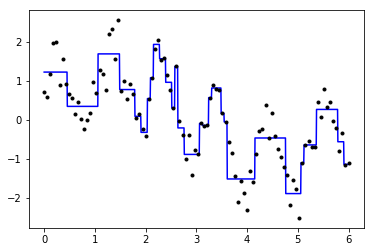

In [6]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X, y_noisy)

X_fit = np.linspace(0, 6, 1000).reshape((-1, 1))
y_fit_1 = clf.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_1, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')

## 2. Random Forests

Here we will use a random forest of 200 trees to reduce the tendency of each
tree to over-fitting the data.

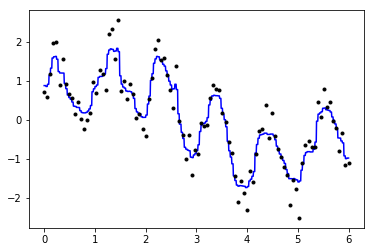

In [7]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200, max_depth=5)
clf.fit(X, y_noisy)

y_fit_200 = clf.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_200, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')

## 3. Gradient Boosting

Another Ensemble method that can be useful is *Boosting*: here, rather than
looking at 200 (say) parallel estimators, We construct a chain of 200 estimators
which iteratively refine the results of the previous estimator.
The idea is that by sequentially applying very fast, simple models, we can get a
total model error which is better than any of the individual pieces.

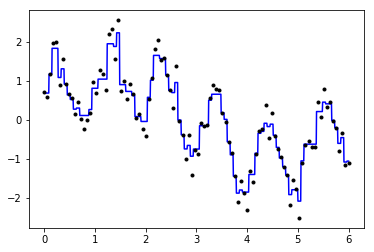

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=200, max_depth=2)
clf.fit(X, y_noisy)

y_fit_200 = clf.predict(X_fit)

plt.plot(X_fit.ravel(), y_fit_200, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')

## Exercise: Cross-validating Gradient Boosting

Use a grid search to optimize the number of estimators and max_depth for a Gradient Boosted
Decision tree.

In [9]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
for model in [DecisionTreeRegressor(),
              GradientBoostingRegressor(),
              RandomForestRegressor()]:
    parameters = {'max_depth':[3, 5, 7, 9, 11]}

    # Warning: be sure your data is shuffled before using GridSearch!
    clf_grid = GridSearchCV(model, parameters)
    clf_grid.fit(X, y_noisy)
    print('------------------------')
    print(model.__class__.__name__)
    print(clf_grid.best_params_)
    print(clf_grid.best_score_)

------------------------
DecisionTreeRegressor
{'max_depth': 9}
0.689777402257
------------------------
GradientBoostingRegressor
{'max_depth': 3}
0.712737826488
------------------------
RandomForestRegressor
{'max_depth': 7}
0.715295343828


Plug this optimal ``max_depth`` into a *single* decision tree.  Does this single tree over-fit or under-fit the data?

In [10]:
### Add another hyper-parameters into GridSearch n_estimators 

In [11]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = {'n_estimators':[200, 300, 400],
              'max_depth':[5, 7, 9]}

# Warning: be sure your data is shuffled before using GridSearch!
clf_grid = GridSearchCV(rf, parameters)
clf_grid.fit(X, y_noisy)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 400], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

best n_estimators: 300
best max_depth: 9


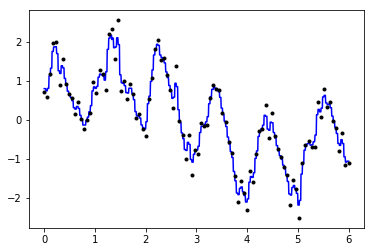

In [12]:
rf_best = clf_grid.best_estimator_
X_fit = np.linspace(0, 6, 1000).reshape((-1, 1))
y_fit_best = rf_best.predict(X_fit)

print("best n_estimators: "+ str(rf_best.n_estimators))
print("best max_depth: "+str(rf_best.max_depth))

plt.plot(X_fit.ravel(), y_fit_best, color='blue')
plt.plot(X.ravel(), y_noisy, '.k')